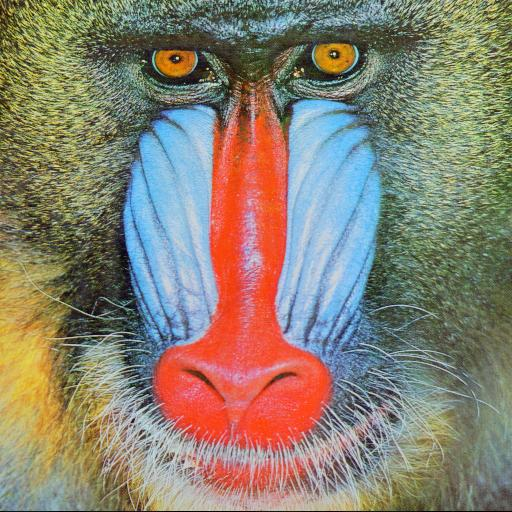

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
I = cv2.imread('mandril.jpg')
cv2_imshow(I)
cv2.waitKey(0)

In [ ]:
cv2.imwrite("m.png",I)

True

In [ ]:
print(I.shape) # dimensions /rows, columns, depth/
print(I.size) # number of bytes
print(I.dtype) # data type


(512, 512, 3)
786432
uint8


In [ ]:
import matplotlib.pyplot as plt

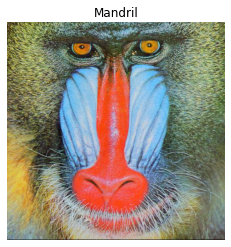

In [ ]:
I = plt.imread('mandril.jpg')
plt.figure(1) # create figure
plt.imshow(I) # add image
plt.title('Mandril') # add title
plt.axis('off') # disable display of the coordinate system
plt.show() # display

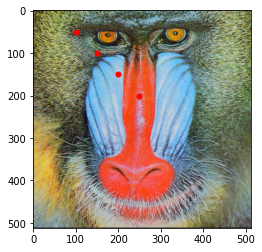

In [ ]:
plt.imsave('mandril.png',I)
x = [ 100, 150, 200, 250]
y = [ 50, 100, 150, 200]
plt.imshow(I)
plt.plot(x,y,'r.',markersize=10)

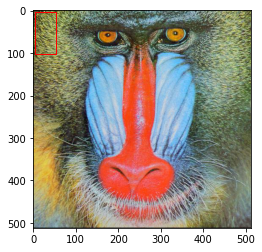

In [ ]:
from matplotlib.patches import Rectangle # add at the top of the file
fig,ax = plt.subplots(1) # instead of plt.figure(1)
rect = Rectangle((3,3),50,100,fill=False, ec='r'); # ec - edge colour
ax.add_patch(rect) # display
ax.imshow(I)
plt.show()

In [ ]:
IG = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
IHSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
print(IG, IHSV)
IH = IHSV[:,:,0]
IS = IHSV[:,:,1]
IV = IHSV[:,:,2]
print(IH, IS, IV)

[[133  49  29 ... 112 145 165]
 [102  85  26 ... 128 138 132]
 [ 57 114  40 ...  81  86  69]
 ...
 [149 149 146 ...  85  82  82]
 [151 144 133 ...  78  75  73]
 [ 15  11   8 ...   6   2   1]] [[[ 97 106 163]
  [ 97 213  78]
  [ 98 255  54]
  ...
  [ 87  65 122]
  [ 87  48 154]
  [ 87  43 174]]

 [[ 96 135 132]
  [ 97 145 114]
  [ 99 255  49]
  ...
  [ 87  64 139]
  [ 87  60 149]
  [ 86  59 142]]

 [[ 96 211  87]
  [ 97 120 144]
  [ 97 228  66]
  ...
  [ 86 118  95]
  [ 86 106  99]
  [ 86 128  82]]

 ...

 [[ 41  28 153]
  [ 36  27 152]
  [ 36  27 149]
  ...
  [107  25  91]
  [107  26  88]
  [107  26  88]]

 [[ 44  28 155]
  [ 41  29 148]
  [ 41  32 137]
  ...
  [112  33  86]
  [112  34  83]
  [112  35  81]]

 [[ 44 228  19]
  [ 46 255  15]
  [ 50 255  12]
  ...
  [112 200  14]
  [114 255  10]
  [120 255   7]]]
[[ 97  97  98 ...  87  87  87]
 [ 96  97  99 ...  87  87  86]
 [ 96  97  97 ...  86  86  86]
 ...
 [ 41  36  36 ... 107 107 107]
 [ 44  41  41 ... 112 112 112]
 [ 44  46  50 ... 

In [ ]:
def rgb2gray(I):
  return 0.299*I[:,:,0] + 0.587*I[:,:,1] + 0.114*I[:,:,2]

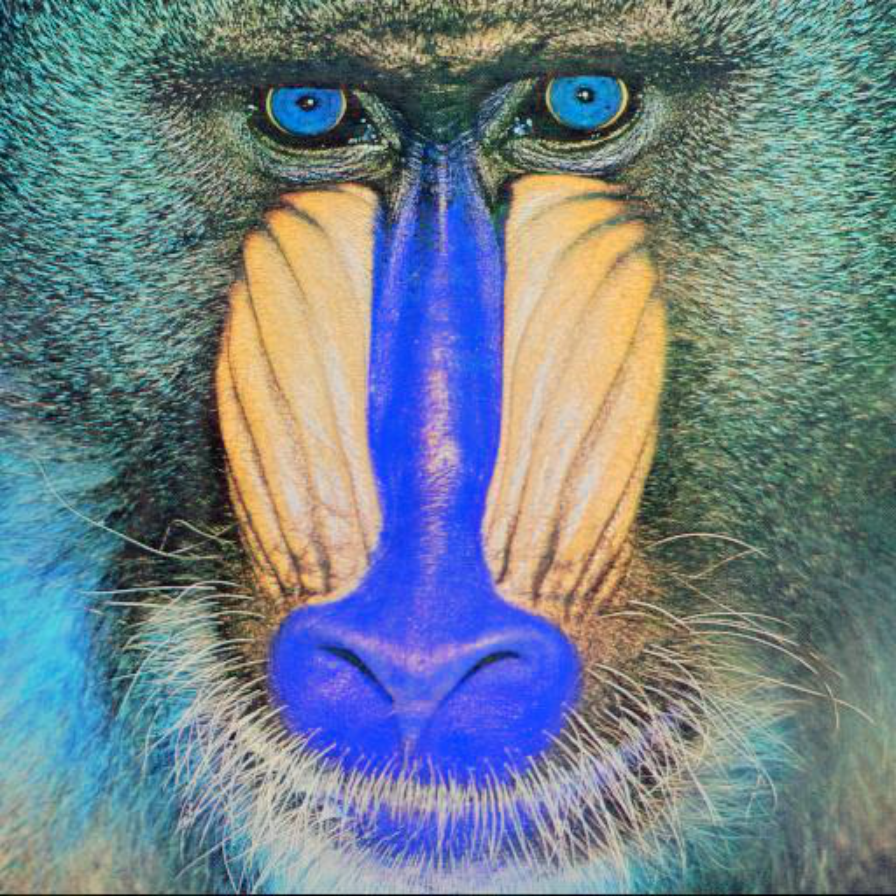

In [ ]:
height, width = I.shape[:2] # retrieving elements 1 and 2, i.e. thecorresponding height and width
scale = 1.75 # scale factor
Ix2 = cv2.resize(I,(int(scale*height),int(scale*width)))
cv2_imshow(Ix2)

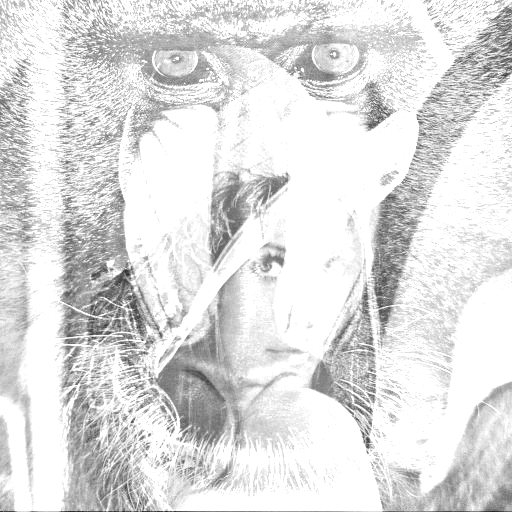

In [ ]:
lena = cv2.imread('lena.png')
gray_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
sum_gray_images = cv2.add(IG, gray_lena)
cv2_imshow(sum_gray_images)

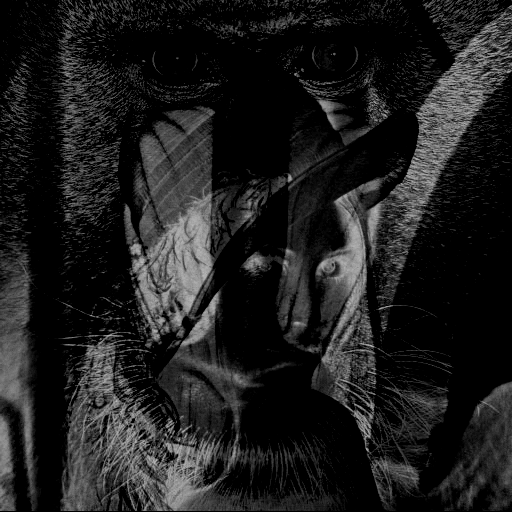

In [ ]:
diff_gray_images = cv2.subtract(IG, gray_lena)

# mnożenie obrazów
mult_gray_images = cv2.multiply(IG, gray_lena)

# wyświetlenie wyników
cv2_imshow(np.uint8(diff_gray_images))


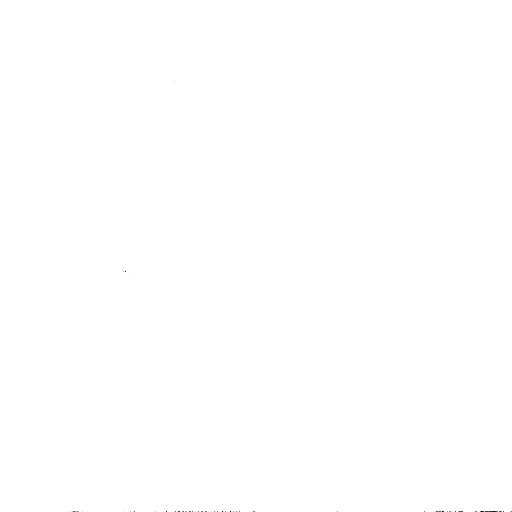

In [ ]:
cv2_imshow(np.uint8(mult_gray_images))

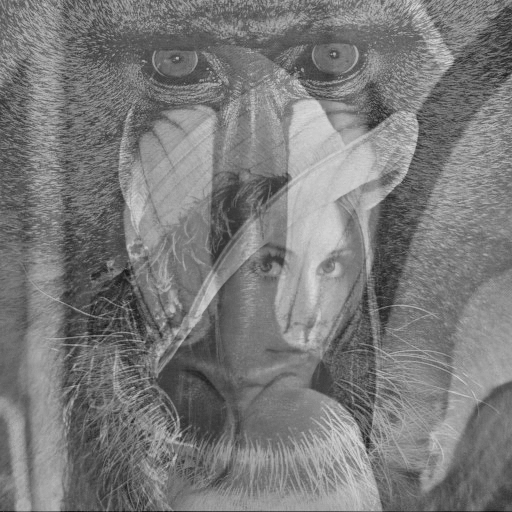

In [ ]:
alpha = 0.5
beta = 0.5

# kombinacja liniowa obrazów
linear_combination = cv2.addWeighted(IG, alpha, gray_lena, beta, 0)
cv2_imshow(np.uint8(linear_combination))

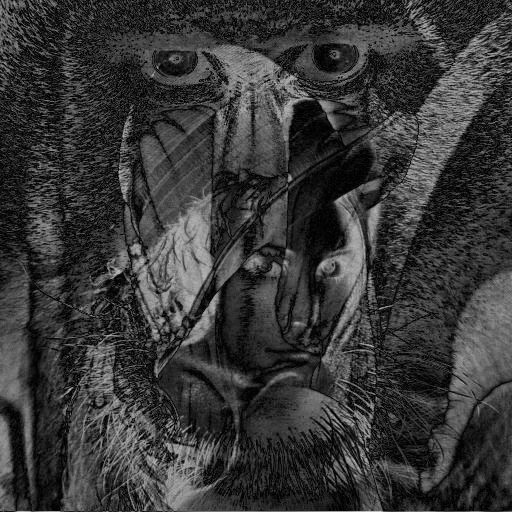

In [ ]:
diff_gray_images_opencv = cv2.absdiff(IG, gray_lena)
cv2_imshow(np.uint8(diff_gray_images_opencv))

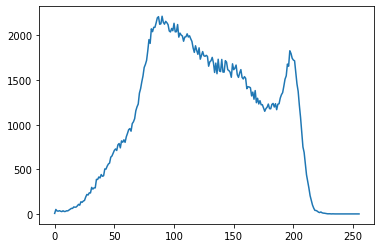

In [ ]:
import numpy as np
def hist(img):
  h=np.zeros((256,1), np.float32) # creates and zeros single-columnarrays
  height, width =img.shape[:2] # shape - we take the first 2 values
  for y in range(height):
    for x in range(width):
      h[img[x,y]] += 1
  return h

hist(IG)
plt.plot(hist(IG))

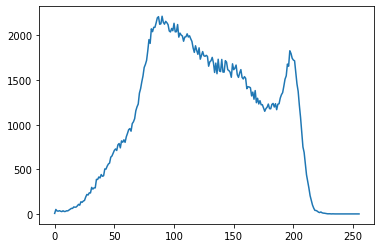

In [ ]:
hist = cv2.calcHist([IG],[0],None,[256],[0,256])
plt.plot(hist)

(array([[ 75.,  35.,  34., ..., 110.,  29.,   0.],
        [ 74.,  49.,  30., ..., 120.,  22.,   0.],
        [ 77.,  40.,  33., ..., 117.,  26.,   0.],
        ...,
        [ 41.,  88.,  71., ...,  15.,  15.,   1.],
        [ 31.,  89.,  81., ...,  15.,   8.,   0.],
        [ 38.,  82.,  69., ...,  33.,   5.,   0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 512 BarContainer objects>)

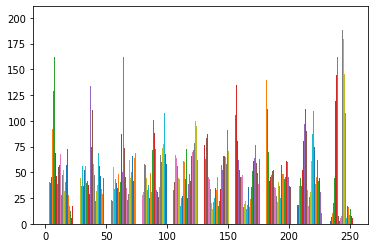

In [ ]:
IGE = cv2.equalizeHist(IG)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
I_CLAHE = clahe.apply(IG)

plt.hist(IGE)

(array([[ 49.,  28.,  36., ...,  94.,  41.,   6.],
        [ 49.,  30.,  40., ...,  97.,  33.,   5.],
        [ 43.,  41.,  30., ..., 106.,  42.,   4.],
        ...,
        [ 54.,  57.,  85., ...,  42.,  12.,   5.],
        [ 43.,  74.,  64., ...,  32.,   6.,   2.],
        [ 43.,  69.,  60., ...,  53.,   8.,   0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 512 BarContainer objects>)

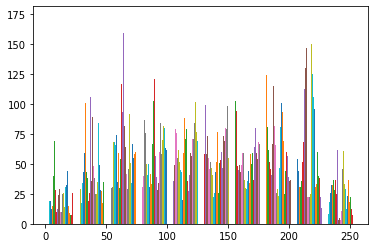

In [ ]:
plt.hist(I_CLAHE)

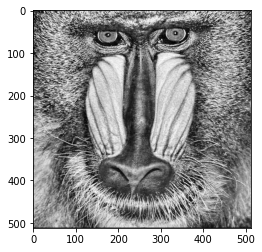

In [ ]:
plt.imshow(I_CLAHE, 'gray')

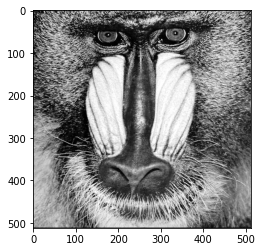

In [ ]:
plt.imshow(IGE, 'gray')

In [ ]:
gaussian = cv2.GaussianBlur(I,(5,5),0)
median = cv2.medianBlur(I, 5)
sob_8u = cv2.Sobel(I,cv2.CV_8U,1,0,ksize=3)
lapl = cv2.Laplacian(gaussian, cv2.CV_64F)

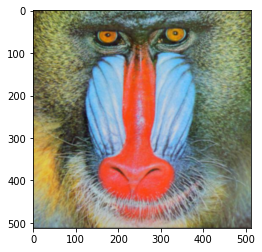

In [ ]:
plt.imshow(gaussian, 'gray')

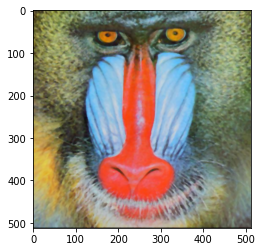

In [ ]:
plt.imshow(median, 'gray')

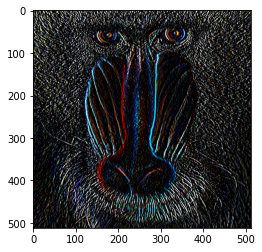

In [ ]:
plt.imshow(sob_8u, 'gray')

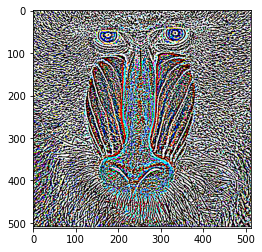

In [ ]:
plt.imshow(lapl, 'gray')